# [MLR with out sklearn](https://medium.com/we-are-orb/multivariate-linear-regression-in-python-without-scikit-learn-7091b1d45905)

In [7]:

# Step 1. Import the libraries and data:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df=pd.read_excel("D:\\github-d\\AI-ML\\Datasets\\house_price.csv.xlsx")
df


,size,bedroom,price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900
5,2050,5,328800


In [8]:
# Standerdaization
df=(df-df.mean())/df.std()
df

,size,bedroom,price
0,0.015810,-0.322749,0.326570
1,-0.869567,-0.322749,-0.359570
2,0.535794,-0.322749,0.023688
3,-1.192800,-1.290994,-1.319185
4,1.589814,0.645497,1.698849
5,-0.079052,1.613743,-0.370352


In [9]:
# Step 2. Normalize the data:
X=df[['size','bedroom']]
y=df[['price']]
X,y


(       size   bedroom
 0  0.015810 -0.322749
 1 -0.869567 -0.322749
 2  0.535794 -0.322749
 3 -1.192800 -1.290994
 4  1.589814  0.645497
 5 -0.079052  1.613743,
       price
 0  0.326570
 1 -0.359570
 2  0.023688
 3 -1.319185
 4  1.698849
 5 -0.370352)

In [10]:
# Step 3. Create matrices and set hyperparameters:

#setting the matrixes
X = df.iloc[:,0:2]
ones = np.ones([X.shape[0],1])
X = np.concatenate((ones,X),axis=1)
y = df.iloc[:,2:3].values #.values converts it from pandas.core.frame.DataFrame to numpy.ndarray
theta = np.zeros([1,3])
#set hyper parameters
alpha = 0.01
iters = 1000
X,y

(array([[ 1.        ,  0.01581031, -0.32274861],
        [ 1.        , -0.86956678, -0.32274861],
        [ 1.        ,  0.53579367, -0.32274861],
        [ 1.        , -1.19279968, -1.29099445],
        [ 1.        ,  1.58981401,  0.64549722],
        [ 1.        , -0.07905153,  1.61374306]]),
 array([[ 0.32656987],
        [-0.35956993],
        [ 0.02368816],
        [-1.31918545],
        [ 1.69884947],
        [-0.37035212]]))

In [11]:
# Step 4. Create the cost function:

def computeCost(X,y,theta):
    tobesummed = np.power(((X @ theta.T)-y),2)
    return np.sum(tobesummed)/(2 * len(X))

In [12]:
# Step 5. Create the Gradient Descent function:

#gradient descent
def gradientDescent(X,y,theta,iters,alpha):
    cost = np.zeros(iters)
    for i in range(iters):
        theta = theta - (alpha/len(X)) * np.sum(X * (X @ theta.T - y), axis=0)
        cost[i] = computeCost(X, y, theta)
    
    return theta,cost

#running the gd and cost function
g,cost = gradientDescent(X,y,theta,iters,alpha)
print(g)

[[ 1.17868678e-16  9.39290050e-01 -3.23786075e-02]]


In [13]:


finalCost = computeCost(X,y,g)
print(finalCost)

0.05825941580149421


Text(0.5, 1.0, 'Error vs. Training')

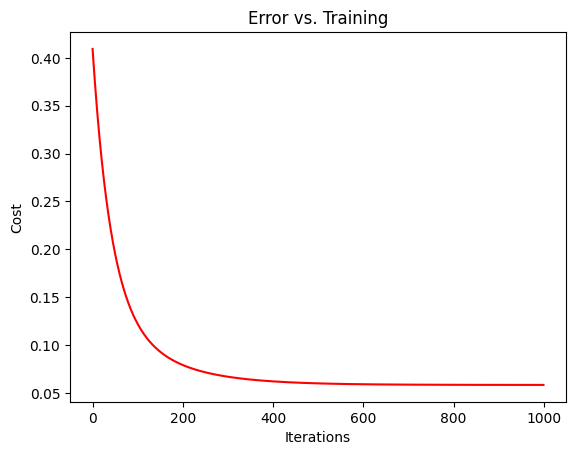

In [14]:

fig, ax = plt.subplots()  
ax.plot(np.arange(iters), cost, 'r')  
ax.set_xlabel('Iterations')  
ax.set_ylabel('Cost')  
ax.set_title('Error vs. Training')  